In [983]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

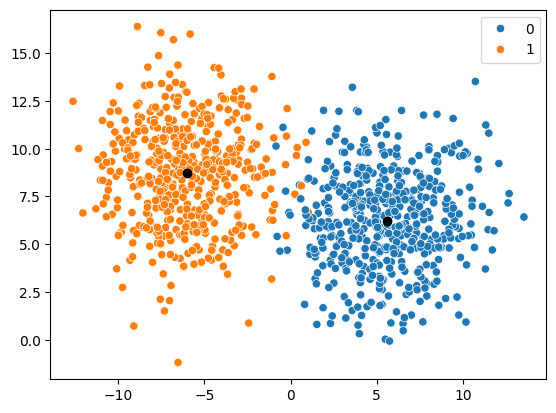

In [1043]:
X, y, centers = make_blobs(centers=2, cluster_std=2.5, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [1044]:
model = KMeans(n_clusters=2)
model.fit(X)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,6.097650,7.649022,1.0
1,3.490468,7.212895,1.0
2,7.310447,5.584207,1.0
3,-6.090297,7.857392,0.0
4,1.912743,12.011912,1.0
...,...,...,...
995,7.152607,7.833514,1.0
996,6.294686,5.955366,1.0
997,-1.907491,8.517612,0.0
998,6.463145,3.800087,1.0


In [1045]:
x,cf,h,z = Simple_CF_Ascent(df=df, target=1.0, centers=centers, model=model, center_mode=False)

label_mapping = {0: "cluster 0", 1: "cluster 1"}

mapped_pred = [label_mapping[int(label)] for label in pred]

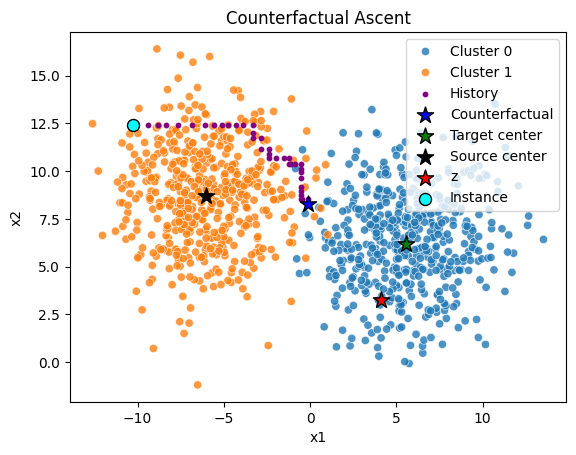

In [1046]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = [f'Cluster {i}' for i in y]
df = df.sort_values(by='label')

sns.scatterplot(df, x='x1', y='x2', hue='label', alpha=0.8, palette='tab10')
plt.scatter(x=hx, y=hy, color='purple', label='History', s=10)
plt.scatter(x=cf[0], y=cf[1], color='blue', label="Counterfactual", marker='*', s=150, edgecolor='black')
plt.scatter(x=centers[0][0], y=centers[0][1], color='green', s=150, 
                  marker='*', label='Target center', zorder=5, edgecolor='black')
plt.scatter(x=centers[1][0], y=centers[1][1], color='black', s=150, 
                  marker='*', label='Source center', zorder=5, edgecolor='black')
plt.scatter(x=z[0], y=z[1], color='red', s=150, 
                  marker='*', label='z', zorder=5, edgecolor='black')
plt.scatter(x=x[0], y=x[1], color='cyan', label='Instance', s=75, edgecolor='black')
plt.title('Counterfactual Ascent')
plt.legend()

# PCA attempt

<Axes: >

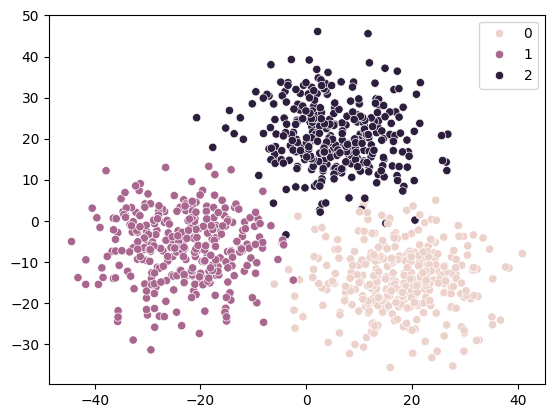

In [988]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [989]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,19.923150,-4.507046,-5.599473,4.386388,3.524769,13.040541,11.529220,7.356704,1.035591,-8.452141,...,7.686110,-15.030480,-3.521125,2.673158,3.198428,0.151343,9.599530,9.697885,6.360781,2.0
1,5.520730,5.825808,-6.600867,2.861168,2.367851,-12.425482,5.553081,-11.572021,-0.172246,-8.762865,...,-11.610545,12.117593,-6.039627,-2.213716,-9.650493,-8.965271,-3.061455,-0.799136,8.730067,1.0
2,-0.264703,8.054001,7.787324,7.442230,-2.635644,1.356372,7.046059,-2.626856,-5.107688,5.870716,...,-1.120144,-12.357729,-4.844347,-6.133923,7.336253,7.893462,-4.883186,-2.721239,2.706935,2.0
3,10.016671,5.377293,-2.246400,-3.034424,-6.263565,-1.414551,1.327740,7.905265,-8.877878,-14.712429,...,1.241854,0.223950,-0.242648,3.258993,-2.700183,7.571238,2.795129,1.312212,-12.859093,1.0
4,-4.519787,-15.765587,-14.541008,2.812597,13.994890,-10.047588,15.884840,-2.466040,13.444221,-14.954891,...,-1.587000,1.791945,0.968058,-14.425784,-10.671990,-3.780171,14.434910,-1.800885,-21.188577,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.800306,-2.021565,10.287813,2.179725,-7.342201,2.386849,12.774310,7.115261,-4.039044,-3.917139,...,10.487416,4.208271,-5.008061,-5.618759,-12.188897,7.710536,2.541512,10.348909,12.880421,2.0
996,-2.923487,-23.146444,-0.888548,-10.225799,-5.187299,6.131296,-3.949956,6.349737,-6.947031,-5.113673,...,4.838842,7.518035,-14.075952,-5.530094,-3.808207,-2.655168,0.832011,-3.702711,17.631988,2.0
997,12.432978,-11.158828,9.911809,2.480098,-9.172049,3.842417,5.655486,-5.020166,-0.104695,5.503707,...,2.720713,-12.517739,-3.149535,-13.157327,1.215382,-24.468660,12.665837,10.064698,4.276768,2.0
998,-7.902052,-16.722214,10.772439,-2.100892,-1.927886,1.514384,-8.015603,5.819519,-15.475780,4.135988,...,8.282253,-15.648608,-9.151148,-17.085590,3.507040,-8.964355,2.122968,-11.456494,11.897300,2.0


In [990]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

ValueError: too many values to unpack (expected 3)

In [ ]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

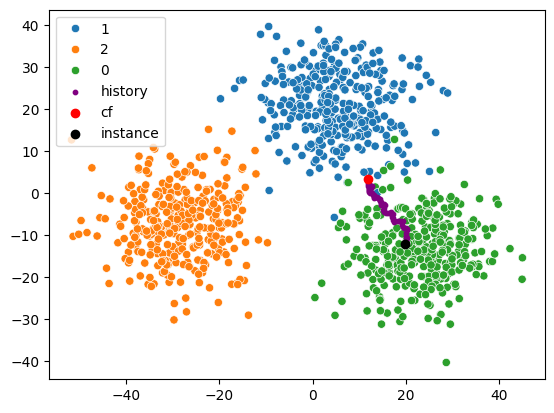

In [ ]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.legend()